## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [3]:
#Reading the data set

students_df = pd.read_csv("R3_data/students_R3_external.csv",delimiter=";")
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
#check for missing values
students_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
#Lets analysze the distribution of the various attributes
students_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395,NaN,NaN,NaN,2.74937,1.09474,0,2,3,4,4
Fedu,395,NaN,NaN,NaN,2.52152,1.0882,0,2,2,3,4
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [6]:
students_df.index = [x for x in range(1, len(students_df.values)+1)]
students_df.index.name = 'number'
students_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
7,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
9,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
# getting the info about the dataframe
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 1 to 395
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [8]:
# getting all column names which are not numerical
cols = students_df.select_dtypes(exclude=[np.int64,np.float64]).columns
print("Columns which are not numerical : \n",cols.values)

Columns which are not numerical : 
 ['school' 'sex' 'address' 'famsize' 'Pstatus' 'Mjob' 'Fjob' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
print("No. of columns in data frame: ", len(students_df.columns))
X_df = students_df.iloc[:,0:32] # dataframe with independent varaibles 
Y_df = students_df.iloc[:,32:]
X_df.var(axis=0,numeric_only=True)


No. of columns in data frame:  33


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
dtype: float64

In [10]:
#finding the variance of all numeric attributes
cols_to_drop = []
var = X_df.var(axis=0,numeric_only=True)
for index, value in var.items():
    if(value < 1):
        cols_to_drop.append(index)
print("Columns to drop from dataframe which has variance < 1 is : \n", cols_to_drop)
    

Columns to drop from dataframe which has variance < 1 is : 
 ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']


In [11]:
#dropping columns which has variance < 1
students_df = students_df.drop(columns=cols_to_drop, axis=1)


In [12]:
#verifiying if the columns has been dropped successfully
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:
#getting all categorical columns
categorical_cols = students_df.select_dtypes(exclude=[np.int64,np.float64]).columns
print("Categorical columns in df is: \n",categorical_cols)

Categorical columns in df is: 
 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [14]:
# Create a boolean mask for categorical columns
categorical_feature_mask = students_df.dtypes==object
categorical_feature_mask
# Get list of categorical column names
categorical_columns = students_df.columns[categorical_feature_mask].tolist()
print("Categorical columns in df is: \n",categorical_columns)


Categorical columns in df is: 
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [15]:
#Encoding all non numericals columns to numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
students_df[categorical_columns] = students_df[categorical_columns].apply(lambda col: le.fit_transform(col))
students_df[categorical_columns].head(10)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
3,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
4,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
5,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
6,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
7,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
8,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
9,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


In [16]:
#Printing the df head to check if everything is converted to numericals
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
1,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
2,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
3,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
4,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
5,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [17]:
#ignore this as it is just copying the data frames
students_df_1 = students_df.copy(deep=True)
students_df_2 = students_df.copy(deep=True)
students_df_3 = students_df.copy(deep=True)

In [18]:
#students_df = students_df_1

In [19]:
#Converting the continuous values of grades into classes


students_df.loc[students_df['G1'] < 10, 'G1'] = 0
students_df.loc[students_df['G1'] >= 10, 'G1'] = 1


students_df.loc[students_df['G2'] < 10, 'G2'] = 0
students_df.loc[students_df['G2'] >= 10, 'G2'] = 1

students_df.loc[students_df['G3'] < 10, 'G3'] = 0
students_df.loc[students_df['G3'] >= 10, 'G3'] = 1

students_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
1,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
2,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
3,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
4,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
5,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
6,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
7,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
8,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
9,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [20]:
students_df.shape

X = students_df.iloc[:,0:26]
print("independent dataframe")
print(X.head(10))

y = students_df.iloc[:, 26:]
print("target dataframe")
print(y.head(10))

independent dataframe
        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
1            0    0   18        1        0        0     4     4     0     4   
2            0    0   17        1        0        1     1     1     0     2   
3            0    0   15        1        1        1     1     1     0     2   
4            0    0   15        1        0        1     4     2     1     3   
5            0    0   16        1        0        1     3     3     2     2   
6            0    1   16        1        1        1     4     3     3     2   
7            0    1   16        1        1        1     2     2     2     2   
8            0    0   17        1        0        0     4     4     2     4   
9            0    1   15        1        1        0     3     2     3     2   
10           0    1   15        1        0        1     3     4     2     2   

        ...  nursery  higher 

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

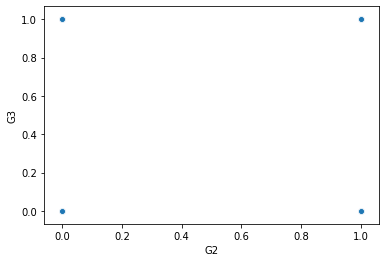

In [21]:
sns.scatterplot(x="G2", y="G3",data=students_df)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

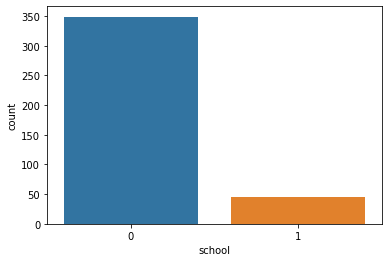

In [22]:
sns.countplot(x='school',data=students_df)

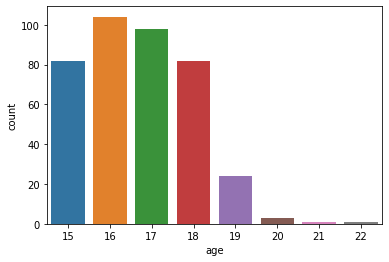

In [23]:
ax = sns.countplot(x="age", data=students_df)


## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [24]:
students_df.shape

(395, 27)

In [25]:
array = students_df.values
X = array[:,0:26] # select all rows and first 26 columns which are the attributes 
Y = array[:,26:]   # select all rows and the 26th column  G3 which is the target
test_size = 95 # taking 300 training and 95 test set
seed = 7  # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print("No. of records in in training set is : ", len(X_train))
print("No. of records in in Test set is : ", len(X_test))


No. of records in in training set is :  300
No. of records in in Test set is :  95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy is :", model_score)
print("F1 score is: ", metrics.f1_score(y_test, y_predict))
print("confusion metrics is : \n",metrics.confusion_matrix(y_test, y_predict))
print("classification report: \n", metrics.classification_report(y_test, y_predict))


Accuracy is : 0.9578947368421052
F1 score is:  0.9714285714285714
confusion metrics is : 
 [[23  2]
 [ 2 68]]
classification report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.97      0.97      0.97        70

    accuracy                           0.96        95
   macro avg       0.95      0.95      0.95        95
weighted avg       0.96      0.96      0.96        95



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Naive bayes with Iris data

### Import Iris.csv

In [27]:
from sklearn.naive_bayes import GaussianNB
iris_df = pd.read_csv("Iris.csv")
iris_df


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [28]:
#check for missing values
iris_df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [29]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [133]:
iris_df[~iris_df.applymap(np.isreal).all(1)]

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [30]:
array = iris_df.values
X = array[:,0:4]
Y = array[:,4:] 
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Find the distribution of target variable (Class)

In [31]:
#Distribution of target variable
iris_df.groupby("Class").count() 

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## the distribution of target variable is equally distributed among different species so the accuracy of the model to predict the class of test data should be high.


In [33]:
#getting the info of dataframe
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## converting non numerical columns to numerical, here target variable is non numerical so converting it to numerical

In [34]:
#converting categorical column 'class' to numerical
# Create a boolean mask for categorical columns
categorical_feature_mask_iris = iris_df.dtypes==object
categorical_feature_mask_iris

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                    True
dtype: bool

In [35]:
# Get list of categorical column names
categorical_columns_iris = iris_df.columns[categorical_feature_mask_iris].tolist()
print("Categorical columns in data set: ",categorical_columns_iris)


Categorical columns in data set:  ['Class']


In [36]:
#LabelEncoder for 'class' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df[categorical_columns_iris] = iris_df[categorical_columns_iris].apply(lambda col: le.fit_transform(col))
iris_df[categorical_columns_iris].head(10)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [39]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask_iris, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False, output an array not sparse matrix

# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(iris_df) # It returns an numpy array
X_ohe

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1. , 0. , 0. , ..., 3.5, 1.4, 0.2],
       [1. , 0. , 0. , ..., 3. , 1.4, 0.2],
       [1. , 0. , 0. , ..., 3.2, 1.3, 0.2],
       ...,
       [0. , 0. , 1. , ..., 3. , 5.2, 2. ],
       [0. , 0. , 1. , ..., 3.4, 5.4, 2.3],
       [0. , 0. , 1. , ..., 3. , 5.1, 1.8]])

In [142]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [40]:
#Lets analysze the distribution of the various attributes
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


### Plot the distribution of target variable using histogram

Text(0, 0.5, 'frequency')

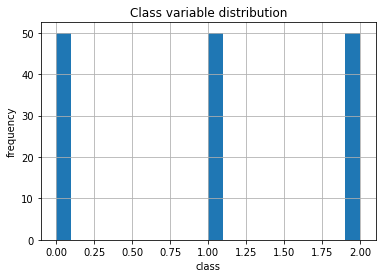

In [41]:
hist_plot=iris_df['Class'].hist(bins=20)
hist_plot.set_title("Class variable distribution")
hist_plot.set_xlabel("class")
hist_plot.set_ylabel('frequency')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

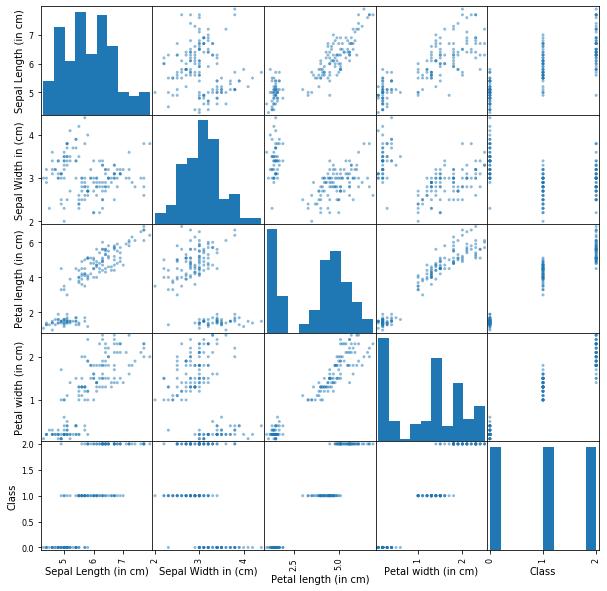

In [42]:
iris_df_attr = iris_df.iloc[:,0:5]
axes = pd.plotting.scatter_matrix(iris_df_attr, figsize=(10,10), diagonal="hist")

### from the above data sepal length and petal length have positive correlation
### petal length and petal width have positive correlation
### iris setosa generally have lower sepal length, petal length and petal width
### Iris-virginica has higher sepal length, petal length and petal width

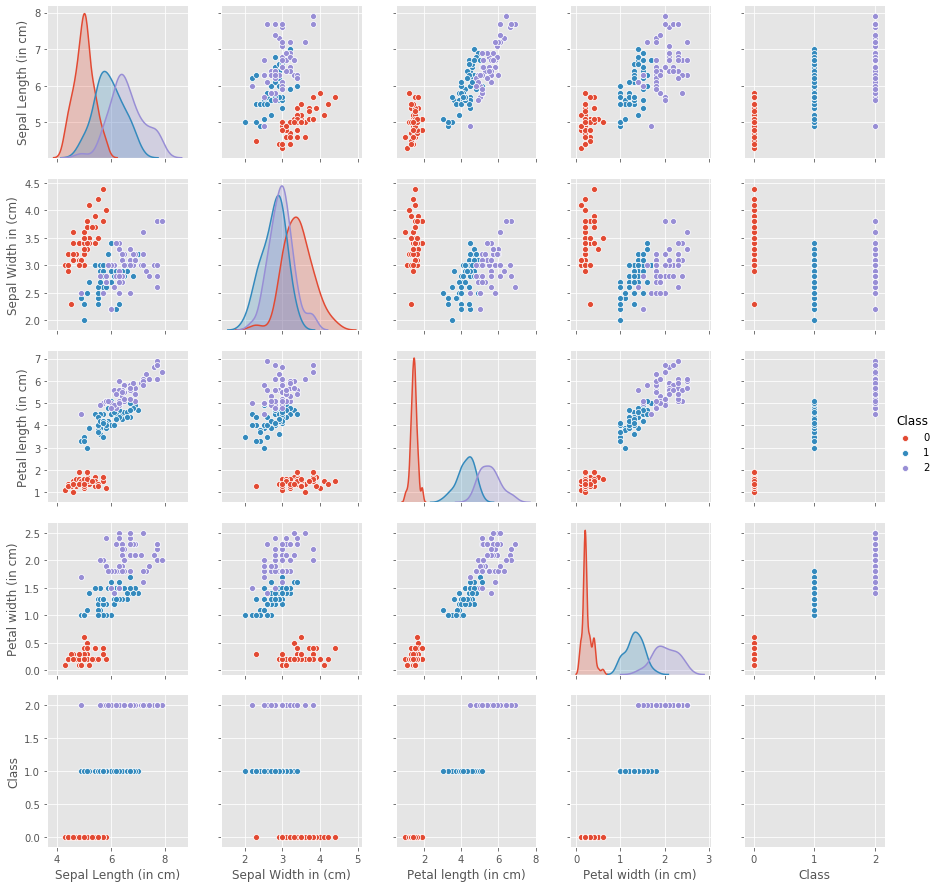

In [94]:
sns.pairplot(iris_df, hue='Class')

### Summary Statistics and explain insights for at least 2 variables

In [43]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## 1. Sepal length and sepal width is normalized as mean and media are almost same
## 2. petal length is slightly left skewed


### Correlation among all variables and give your insights

In [97]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


## Insights
### 1. sepal length and sepal width is not correlated at all
### 2. patel length and petal width is highly corelated with sepal length
### 3. petal width and petal length is highly corelated

### Split data in Training and Validation in 80:20

In [44]:
array = iris_df.values
X = array[:,0:4] # select all rows and first 26 columns which are the attributes 
Y = array[:,4:]   # select all rows and the 26th column  G3 which is the target
test_size = 0.2 # taking 300 training and 95 test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print("No. of records in in training set is : ", len(X_train))
print("No. of records in in Test set is : ", len(X_test))


No. of records in in training set is :  120
No. of records in in Test set is :  30


In [45]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Do Feature Scaling

In [46]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)


### Train and Fit NaiveBayes Model

In [47]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
# make predictions
expected = y_test
predicted = model.predict(X_test_scaled)
# summarize the fit of the model
model_score = model.score(X_test_scaled, y_test)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [49]:
print("Accuracy is :", model_score)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Accuracy is : 0.8666666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.79      0.92      0.85        12
         2.0       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.89      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]


### Analyzing the confusion matrix

### out of 30 test data , we have predicted species 26 test data correctly

### we correctly predicted 100% i.e 7/7 as class Iris-setosa
### we correctly predicted 100% i.e 11/12 as class Iris-versicolor
### we correctly predicted 100% i.e 8/11 as class Iris-virginica
### we wrongly predicted 1 Iris-versicolor as Iris-virginica
### we wrongly predicted 3 Iris-virginica as Iris-versicolor
